In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
%matplotlib inline

In [11]:
# Loading  data
df = pd.read_csv('UCI_Credit_Card_balanced.csv')

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(df.drop('Y',axis=1))

StandardScaler()

In [15]:
scaled_features = scaler.fit_transform(df.drop('Y',axis=1))

In [16]:
X = pd.DataFrame(scaled_features,columns=df.columns[:-1]).values
y = df['Y'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
    # create model
    model = Sequential()
        
    # hidden layer
    model.add(Dense(50, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())

    # hidden layer
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())

    # hidden layer
    model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())

    # hidden layer
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())

    # hidden layer
    model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())

    # output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
es = EarlyStopping(monitor='accuracy', patience=20, restore_best_weights=True)

In [21]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score, auc, roc_curve, precision_score, recall_score

In [22]:
t0 = datetime.now()
model.fit(X_train, 
            y_train, 
            epochs=200,
            batch_size=500,
            validation_data=(X_test, y_test),
            verbose=0)
t1 = datetime.now()
print("Training Time: ", (t1 - t0))

Training Time:  0:01:25.078920


In [23]:
losses = pd.DataFrame(model.history.history)

<Figure size 504x360 with 0 Axes>

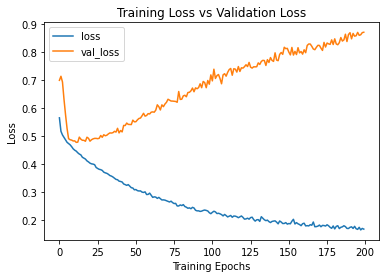

In [24]:
plt.figure(figsize=(7, 5))
losses[['loss','val_loss']].plot()
plt.xlabel('Training Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend(loc='best')
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\dnn_validation_loss_unreg.png')
plt.show()